In [2]:
import sys
sys.path.append('/home/jjwhit/rcGAN/')

In [3]:
import torch
from torchvision import transforms
from PIL import Image
import yaml
import types
import json

import numpy as np
import matplotlib.patches as patches

from data.lightning.MassMappingDataModule import MMDataModule
from utils.parse_args import create_arg_parser
from pytorch_lightning import seed_everything
from models.lightning.mmGAN import mmGAN
from utils.mri.math import tensor_to_complex_np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from scipy import ndimage

/home/jjwhit/rcGAN/fastmri/__init__.py:16: UserWarning: Could not retrieve fastmri version!
  warnings.warn("Could not retrieve fastmri version!")


In [4]:
device =  torch.device("cuda:0")

In [5]:
model = mmGAN.load_from_checkpoint('/share/gpu0/jjwhit/mass_map/mm_models/mmgan_training_8/checkpoint_best.ckpt')
model.to(device)

mmGAN(
  (generator): UNetModel(
    (down_sample_layers): ModuleList(
      (0): ConvDownBlock(
        (conv_1): Conv2d(4, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (res): ResidualBlock(
          (conv_block): Sequential(
            (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): PReLU(num_parameters=1)
            (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (5): PReLU(num_parameters=1)
          )
          (conv_1x1): Conv2d(128, 128, kernel_size=(1, 1), stride=(1, 1))
        )
        (conv_3): Conv2d(128, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (activation): PReLU(

In [6]:
input_image_path = '/share/gpu0/jjwhit/mass_map_dataset/kappa20_cropped/kappa_test/kappa_run_08786.npy'

input_image =  np.load(input_image_path)

In [9]:
print(input_image.shape)

(384, 384)


In [7]:
with torch.no_grad():
    output_image = model(input_image)

TypeError: 'int' object is not callable

In [ ]:
with open('home/jjwhit/rcGAN/configs/mass_map_8.yml', 'r') as f:

for i, data in enumerate(test_loader):
    y,x,mean,std = data
    y = y.cuda()
    x = x.cuda()
    mean  = mean.cuda()
    std  = std.cuda()

    gens_mmGAN = torch.zeros(size=(y.size(0), 32,  384,  384, 2)).cuda()
    for  z in range(32):
        gens_mmGAN[:,z,:,:,:] = mmGAN_model.reformat(mmGAN_model.forward(y))

    for j in range(y,size(0)):
        np_samps = {'mmGAN':[],}

        for z in range(32):
            np_samps['mmGAN'].append(ndimage.rotate(torch.tensor(tensor_to_complex_np(gens_mmGAN[j,z]*std[j] + mean[j]).cpu())).abs().numpy(),180))

In [ ]:
ax = plt.subplot(gs[0, samp + 5])
ax.imshow(np_samps[method][samp], cmap='inferno',  vmin=0, vmax=0.7*np.max(np_gt)))
ax.set_title(f'Samples{samp+1})

In [7]:
from PIL import Image
import os

In [12]:
directory =  '/share/gpu0/jjwhit/test_figures_1/'

In [13]:
images = []

In [14]:
for filename in os.listdir(directory):
    if filename.endswith(".png"):
        img = Image.open(os.path.join(directory, filename))
        images.append(img)

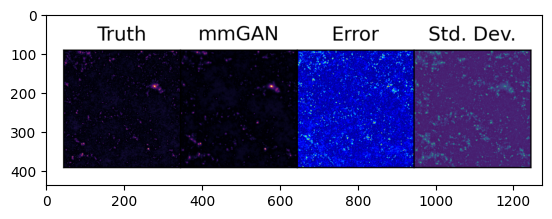

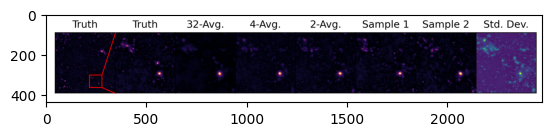

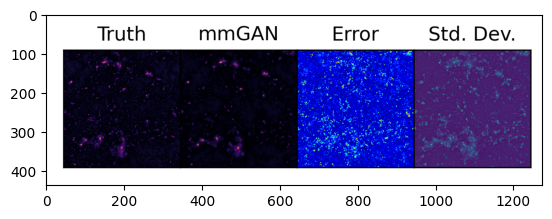

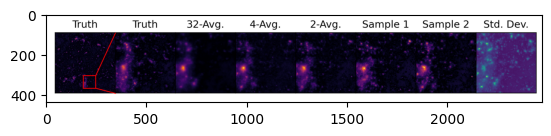

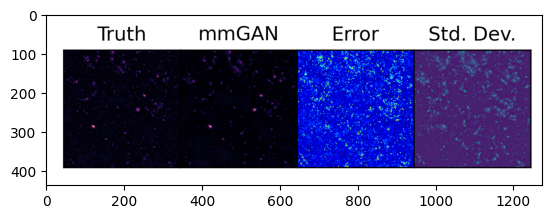

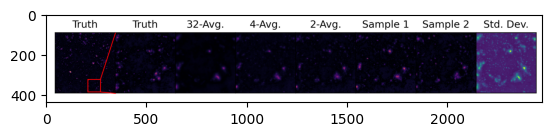

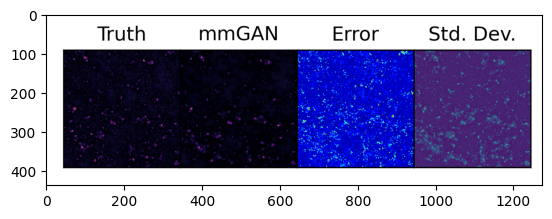

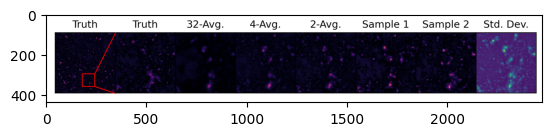

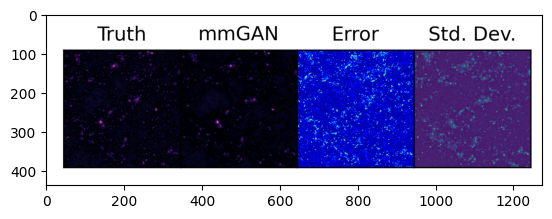

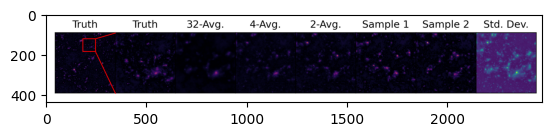

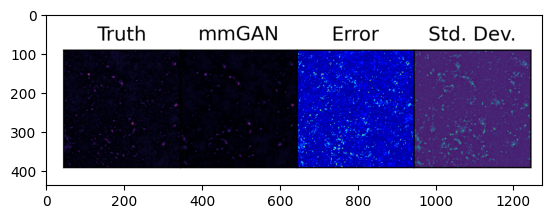

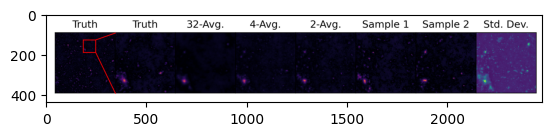

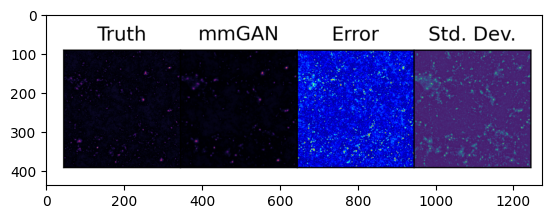

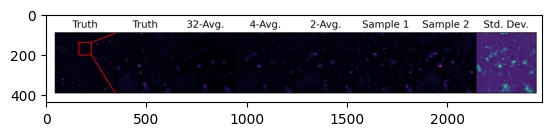

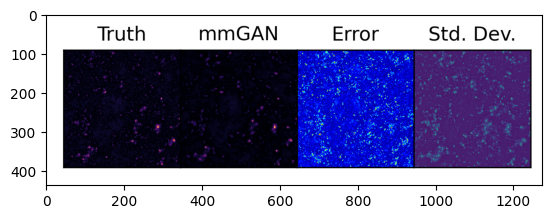

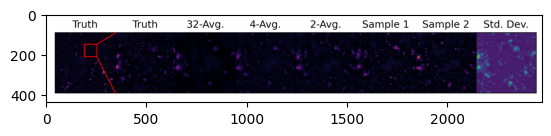

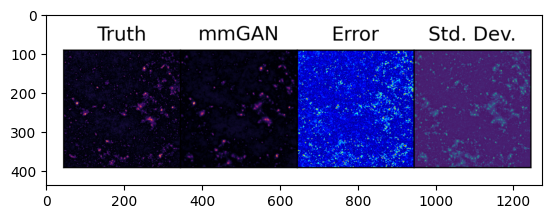

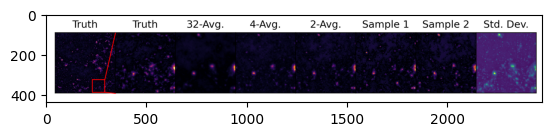

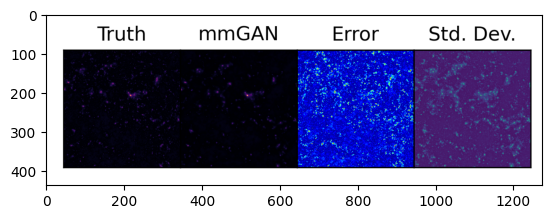

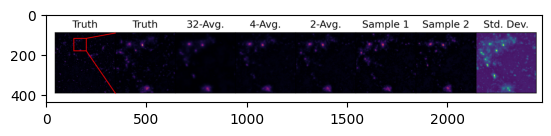

In [15]:
import matplotlib.pyplot as plt

for img in images:
    plt.imshow(img)
    plt.show()

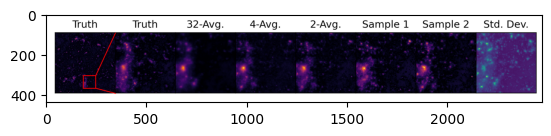

In [18]:
nice_image = Image.open('/share/gpu0/jjwhit/test_figures_1/zoomed_avg_samps_2.png')
plt.imshow(nice_image)
plt.show()

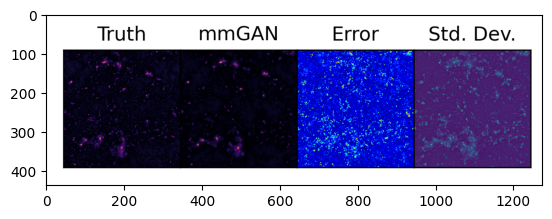

In [19]:
nice_image = Image.open('/share/gpu0/jjwhit/test_figures_1/test_fig_avg_err_std_2.png')
plt.imshow(nice_image)
plt.show()